# Análise de dados OD projeto FotoAgua

Notebook para analisar os dados de oxigenio dissolvido do projeto fotoagua

(1) Leitura dos dados .csv;

(2) Separa os dados por mês e dia;

(3) Visualiza os perfis diários;

(4) Retorna dados estatisticos de OD maior no LR (longe da influência dos painéis) que no PV1 (na influência dos painéis);


Autor: 
* MSc. Eng. Pedro Gabriel Grochocki Gabriel $^\text{a}$

$^\text{a}$ Curso de Doutorado em Engenharia Ambiental - UFPR<br/>

email - pedro.gmlivre@gmail.com

Whatsapp - (41) 99810-5797

## alterações:

16/06/2023 - Adicionado dados estatisticos para contagem de dias em que OD do LR ficou acima de PV1
23/10/2023 - Adicionado dados de miniPAR

In [474]:
import pandas as pd
from datetime import datetime, date, timedelta
import datetime

In [475]:
df1 = pd.read_csv('Dados Tratados/Ajuste_hora_Csaturacao_sem_excedentes_LR.csv')
df1.index = df1['Data Calculada']
df1 = df1.drop(['Saturação OD (%)'], axis=1)

df1 = df1.rename(columns={'Segundos': 'seg1'})

df2 = pd.read_csv('Dados Tratados/Ajuste_hora_Csaturacao_sem_excedentes_PV1.csv')
df2 = df2.drop(['Temperatura(deg C)','Saturação OD (%)'], axis=1)
df2.index = df2['Data Calculada']
df1 = df1.rename(columns={'Segundos': 'seg2'})

df3 = pd.read_csv('Dados Tratados/Ajuste_hora_miniPAR_LR.csv')
df3.index = df3['Data Calculada']
df3 = df3.rename(columns={'Segundos': 'seg3'})

df4 = pd.read_csv('Dados Tratados/Ajuste_hora_miniPAR_PV1.csv')
df4.index = df4['Data Calculada']
df4 = df4.rename(columns={'Segundos': 'seg3'})

df = pd.concat([df1, df2], axis=1)
df = pd.concat([df, df3], axis=1)
df = pd.concat([df, df4], axis=1)
df = df.sort_values(by= 'Segundos')
df = df.drop(columns=['seg1', 'Segundos','Data Calculada', 'seg3'])
df

,Temperatura(deg C),OD(mg/L),OD de Saturação (mg/L),OD(mg/L),OD de Saturação (mg/L),PAR (umol/(s m^2)),PAR (umol/(s m^2))
Data Calculada,,,,,,,
2022-11-02 01:10:00,NaN,NaN,NaN,8.0830,8.096107,NaN,NaN
2022-11-02 01:20:00,NaN,NaN,NaN,8.0900,8.096824,NaN,NaN
2022-11-02 01:30:00,NaN,NaN,NaN,8.0775,8.096824,NaN,NaN
2022-11-02 01:40:00,NaN,NaN,NaN,8.0730,8.098177,NaN,NaN
2022-11-02 01:50:00,NaN,NaN,NaN,8.0710,8.101521,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-19 11:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 11:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [477]:
df.columns = ['temperatura','OD LR', 'OD sat LR', 'OD PV1', 'OD sat PV1', 'PAR LR', 'PAR PV1']
df.index = pd.to_datetime(df.index,dayfirst=True)
df

,temperatura,OD LR,OD sat LR,OD PV1,OD sat PV1,PAR LR,PAR PV1
Data Calculada,,,,,,,
2022-11-02 01:10:00,NaN,NaN,NaN,8.0830,8.096107,NaN,NaN
2022-11-02 01:20:00,NaN,NaN,NaN,8.0900,8.096824,NaN,NaN
2022-11-02 01:30:00,NaN,NaN,NaN,8.0775,8.096824,NaN,NaN
2022-11-02 01:40:00,NaN,NaN,NaN,8.0730,8.098177,NaN,NaN
2022-11-02 01:50:00,NaN,NaN,NaN,8.0710,8.101521,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-19 11:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 11:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
df = df.resample('60min').mean()
df

,temperatura,OD LR,OD sat LR,OD PV1,OD sat PV1,PAR LR,PAR PV1
Data Calculada,,,,,,,
2022-11-02 01:00:00,NaN,NaN,NaN,8.078900,8.097890,NaN,NaN
2022-11-02 02:00:00,NaN,NaN,NaN,8.044333,8.106145,NaN,NaN
2022-11-02 03:00:00,NaN,NaN,NaN,7.985667,8.115393,NaN,NaN
2022-11-02 04:00:00,NaN,NaN,NaN,7.963917,8.121524,NaN,NaN
2022-11-02 05:00:00,NaN,NaN,NaN,7.901500,8.128907,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-19 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtro por data

In [479]:
df['hour'] = df.index.hour
df = df.dropna()
result = [group[1] for group in df.groupby(df.index.date)]
result

[                     temperatura     OD LR  OD sat LR    OD PV1  OD sat PV1  \
 Data Calculada                                                                
 2023-04-01 10:00:00    24.723583  7.326583   7.496958  6.993417    7.497936   
 2023-04-01 11:00:00    24.796625  7.287042   7.486916  6.754917    7.483161   
 2023-04-01 12:00:00    24.830250  7.399583   7.482302  6.763250    7.479165   
 2023-04-01 18:00:00    24.719958  6.785417   7.497461  6.432000    7.491684   
 2023-04-01 19:00:00    24.672042  6.933333   7.504058  5.824000    7.505835   
 2023-04-01 20:00:00    24.708667  7.223667   7.499012  5.336208    7.499276   
 2023-04-01 23:00:00    24.708583  7.471250   7.499022  5.663875    7.499757   
 
                           PAR LR     PAR PV1  hour  
 Data Calculada                                      
 2023-04-01 10:00:00   874.450000   21.433333    10  
 2023-04-01 11:00:00  1063.600000  108.200000    11  
 2023-04-01 12:00:00   989.200000   17.000000    12  
 2023-04

2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-16
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22
2023-04-23


KeyboardInterrupt: 

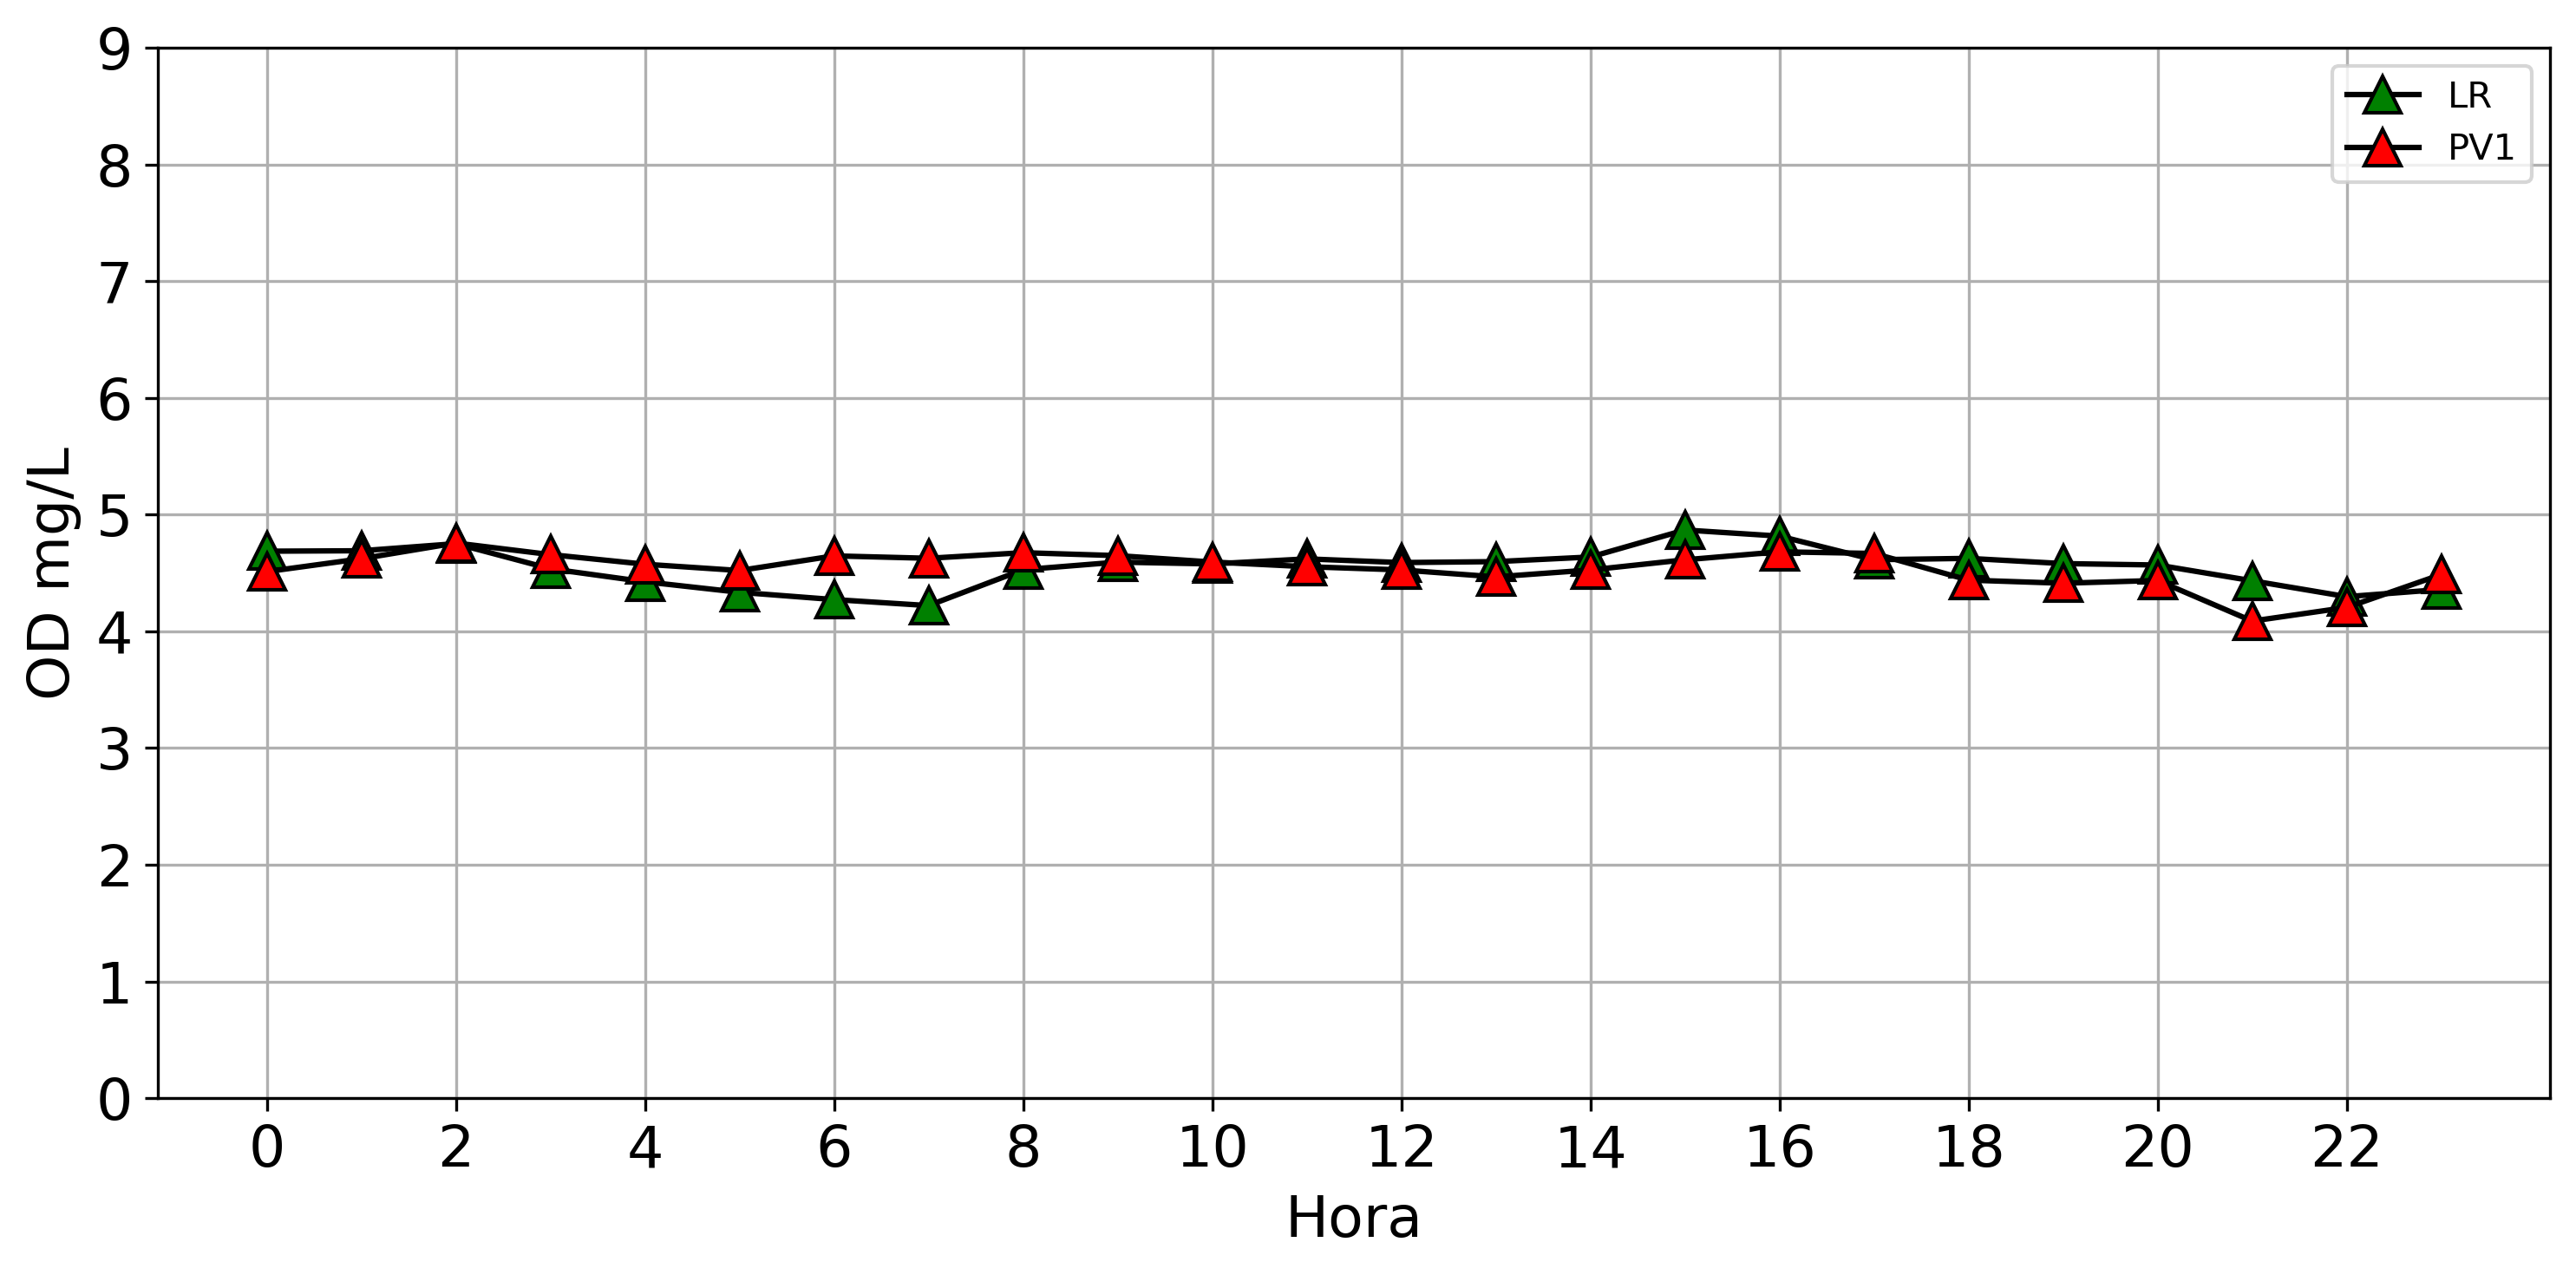

In [436]:
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 


for n in range(len(result)):
    #print(str(n))
    data = str(result[n].index[0])[:-9]
    mes = data[5:-3]
    ano = data[:-6]
    (Path('.') / 'graficos'/ano/mes).mkdir(parents=True, exist_ok=True)# cria pasta para o Ano analisado
    print(data)
    #print(mes)
    figure(figsize=(10, 5), dpi=300)
    plt.plot(result[n]['hour'],result[n]['OD LR'], color = 'black',marker = '^', ms = 10, mfc = 'green', label='LR')
    plt.plot(result[n]['hour'],result[n]['OD PV1'], color = 'black',marker = '^', ms = 10, mfc = 'red',label='PV1')
    #plt.plot(result[n]['hour'],result[n]['OD sat LR'], color = 'blue',label='OD sat.')
    plt.plot(result[n]['hour'],result[n]['OD sat PV1'], color = 'red',label='PV1 sat')

    plt.ylabel('OD mg/L', fontsize=16)
    plt.xlabel('Hora', fontsize=16)
    plt.yticks(np.arange(0, 10, 1))
    plt.xticks(np.arange(0, 24, 2))

    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.savefig("graficos/"+ano+'/'+mes+'/'+data+".png", dpi = 300)
    plt.close()
    

In [480]:
contagem_LR = 0
parcial = 0
for n in range(len(result)):
    data = str(result[n].index[0])[:-9]
    A = result[n]
    for i in range (len(A)):
        OD_LR  = A['OD LR'][i]
        OD_PV1 = A['OD PV1'][i]
        if OD_LR > OD_PV1:
            contagem_LR = contagem_LR + 1
            pass
        else:
            parcial = parcial + 1
            pass
        pass
    pass

total = contagem_LR + parcial
porc_OD_LR_ACIMA_PV1 = contagem_LR*100/total 
porc_OD_LR_ACIMA_PV1

print("N de OD no LR maior que o PV1: ", contagem_LR)
print("N total de medições: ", parcial)
print("% de LR > PV1: ", round(porc_OD_LR_ACIMA_PV1,2) , ' %')

N de OD no LR maior que o PV1:  2752
N total de medições:  347
% de LR > PV1:  88.8  %


In [488]:
result[n]['temperatura'].values

array([22.58795833, 22.57404167, 22.55783333, 22.54366667, 22.52358333,
       22.515875  , 22.50425   , 22.50954167, 22.48266667, 22.48990278,
       22.513875  , 22.57525   , 22.57004167, 22.51044444, 22.50422222,
       22.49958333, 22.46916667, 22.44741667, 22.42375   , 22.425875  ,
       22.42858333, 22.405625  , 22.37429167, 22.361     ])

In [611]:
n=15
#n= 17
#n =7
n = 39

In [612]:
Od_sat = result[n]['OD sat LR'].values
Od_i = result[n]['OD LR'].values
RAD_PAR = result[n]['PAR LR'].values
delta_t = 1# hora
taxa_rea = 0.008#0.01
J = 0.0003 #0.001
producao = J*RAD_PAR
consumo = 0.02

In [640]:
Od_sat = result[n]['OD sat LR'].values
Od_i = result[n]['OD LR'].values
RAD_PAR = result[n]['PAR LR'].values
delta_t = 1# hora
taxa_rea = 0.001#0.01
J = 0.0003 #0.001
producao = J*RAD_PAR
consumo = 0.03

In [641]:
modelo = []
modeloPV = []
modelo.append(Od_i[0])
for i in range(len(result[n])):
    modelo.append(modelo[i] + delta_t*i*(producao[i] - consumo + taxa_rea*(Od_sat[i] - modelo[i])))

In [642]:
modelo = modelo[1:]
len(modelo)
modelo

[4.869,
 4.842171641030614,
 4.7885944024804745,
 4.7084246833969825,
 4.601721458511965,
 4.468904355694284,
 4.312401626963849,
 4.21157900455666,
 4.221910450238425,
 4.356401881870796,
 4.695496116443458,
 6.070590992716821,
 7.390023091484739,
 9.33871498000937,
 11.004866601040025,
 11.7643596384926,
 11.55113375627019,
 11.097915901673296,
 10.502565902516936,
 9.885636452502299,
 9.247947270857523,
 8.592184969849754,
 7.919769565767576,
 7.232432625053439]

/var/folders/b1/jt5k1wqd6456ym1lhh704g000000gn/T/ipykernel_6546/30943819.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


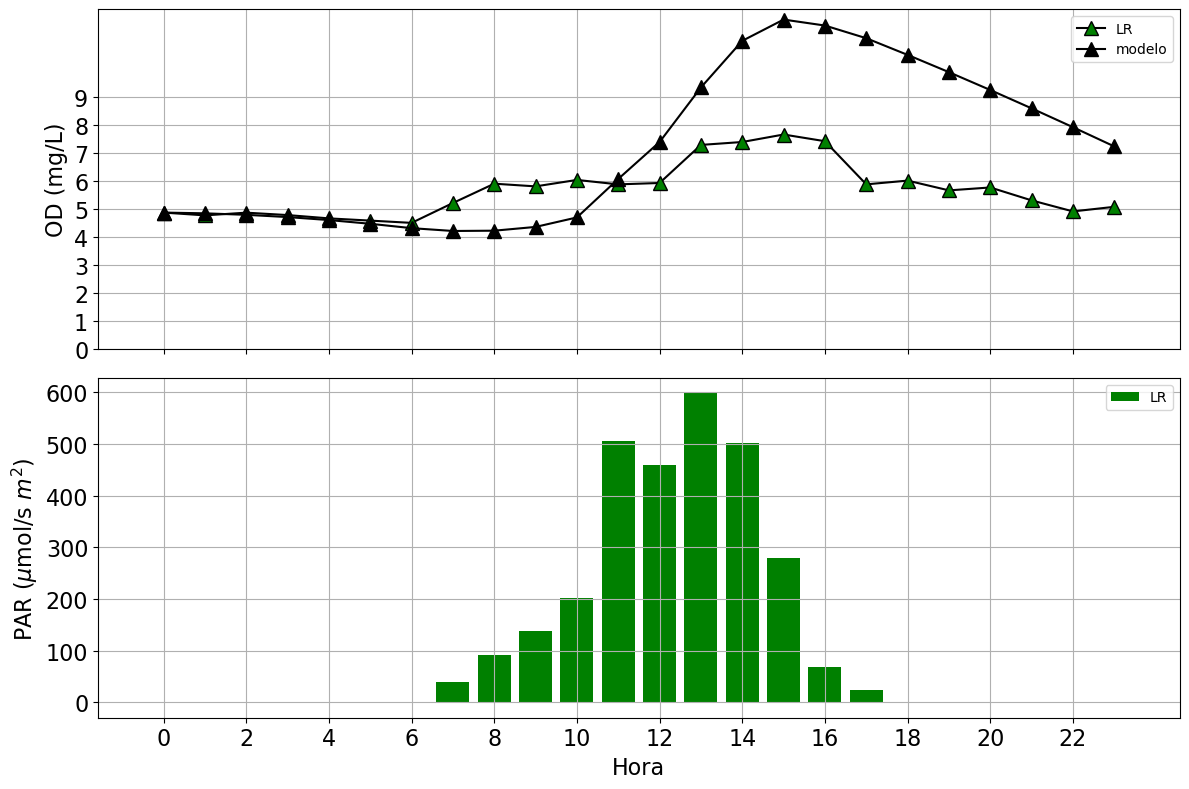

In [643]:
plt.subplots(1,2, figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(result[n]['hour'],result[n]['OD LR'], color = 'black',marker = '^', ms = 10, mfc = 'green', label='LR')
#plt.plot(result[n]['hour'],result[n]['OD PV1'], color = 'black',marker = '^', ms = 10, mfc = 'red',label='PV1')
#plt.plot(result[n]['hour'],result[n]['OD sat LR'], color = 'blue',label='OD sat.')


plt.plot(result[n]['hour'],modelo, color = 'black',marker = '^', ms = 10, mfc = 'black',label='modelo')



plt.ylabel('OD (mg/L)', fontsize=16)
#plt.xlabel('Hora', fontsize=16)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 24, 2))

plt.grid()
plt.tight_layout()
plt.legend()
plt.tick_params('x', labelbottom=False)

plt.subplot(2, 1, 2,sharex=plt.subplot(2, 1, 1))
plt.bar(result[n]['hour'],result[n]['PAR LR'], color = 'green',label='LR')
#plt.bar(result[n]['hour'],result[n]['PAR PV1'], color = 'red',label='PV1')

plt.ylabel('PAR ($\mu$mol/s $m^2$)', fontsize=16)
plt.xlabel('Hora', fontsize=16)

plt.xticks(np.arange(0, 24, 2))

plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig("teste"+str(n)+".png", dpi = 300)

In [425]:
result[7]

,OD LR,OD sat LR,OD PV1,OD sat PV1,PAR LR,PAR PV1,hour
Data Calculada,,,,,,,
2023-04-08 00:00:00,5.441333,7.698169,4.044417,7.700701,0.000000e+00,-0.033333,0
2023-04-08 01:00:00,5.081750,7.701014,3.461500,7.703131,1.166667e-01,-0.008333,1
2023-04-08 02:00:00,5.307125,7.705201,3.579500,7.705539,3.333333e-02,-0.008333,2
2023-04-08 03:00:00,5.204042,7.706874,3.973792,7.707773,-1.666667e-02,-0.008333,3
2023-04-08 04:00:00,5.080167,7.708534,4.156208,7.710269,-3.333333e-02,0.008333,4
2023-04-08 05:00:00,5.121750,7.710650,4.368833,7.712106,-2.500000e-02,-0.025000,5
2023-04-08 06:00:00,5.280083,7.712705,4.193292,7.715137,4.241667e+00,0.183333,6
2023-04-08 07:00:00,6.031083,7.712663,4.014292,7.716765,3.383333e+01,1.558333,7
2023-04-08 08:00:00,6.622417,7.712675,4.156958,7.717467,7.100000e+01,3.050000,8
